In [1]:
#Rosa Vergara  801073142
%matplotlib inline
import numpy as np
import torch
import matplotlib.pyplot as plt
import pandas as pd
import torch.optim as optim
import torch.nn as nn
import time
torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
#Problem 1

data=pd.read_csv("C:/Users/rosam/OneDrive/Desktop/ECGR5106/HW1/Housing.csv")
housing_df=pd.DataFrame(data)
#set up to see correlation between 'prices' and 'place features'
placeFeatures=['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
placePrice=['price']
#inputs x_df
X=housing_df[placeFeatures]
#target y_df
Y=housing_df[placePrice]

#housing_df.head()

#U= w5*x5 + w4*x4 + w3*x3 + w2*x2 + w1*x1 + B squredDiff
# x torch.Size([545, 5])  y torch.Size([545])
#turn to tensor
x = torch.tensor(X.values, dtype = torch.float64)
y = torch.tensor(housing_df['price'].values, dtype = torch.float64).unsqueeze(1)

#slpit data 80% training 20% validation
n_samples = x.shape[0]
n_val = int(0.2 * n_samples)
shuffled_indices = torch.randperm(n_samples)
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]
#train_indices, val_indices

#setting train and validation
xTrain = x[train_indices]
xVal = x[val_indices]
yTrain = y[train_indices]
yVal = y[val_indices]

#normalize
normxTrain = torch.nn.functional.normalize(xTrain, dim=0)
normxVal = torch.nn.functional.normalize(xVal, dim=0)
normyTrain = torch.nn.functional.normalize(yTrain, dim=0)
normyVal = torch.nn.functional.normalize(yVal, dim=0)

#Training
def training_loop(numEpochs, optimizer, modelHouse, loss_fn, y_Train, y_Val, x_Train, x_Val):
    training_start_time = time.time()
    for epoch in range(1, numEpochs +1):
        #prediction
        y_pTrain=modelHouse(x_Train)
        loss=loss_fn(y_pTrain, y_Train)
        
        #y_pVal=modelHouse(x_Val)
        #lossVal=loss_fn(y_pVal, y_Val)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (epoch % 5) == 0 or epoch == 199:
            #print('Epoch: {},'.fprmat(epoch) + 'Training loss: {:.4f}'.format(loss_train) + 'Validation loss: {:.4f}'.format(lossVal))
            print(f"Epoch {epoch}, Loss {loss.item():.4f}")#,"f" Validation loss {lossVal.item():.4f}")
    print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))
    

def accuracy(model, xds, yds, pct):
    # assumes model.eval()
    # percent correct within pct of true house price
    correct = 0
    wrong = 0
    
    for i in range(len(yds)):
        X = xds[i]            # (predictors, target)
        Y = yds[i]
        with torch.no_grad():
            output = model(X)         # computed price
            abs_delta = np.abs(output.item() - Y.item())
            max_allow = np.abs(pct * Y.item())
            if abs_delta < max_allow:
                correct +=1
            else:
                wrong += 1
        acc = (correct * 1.0) / (correct + wrong)
        return acc

In [36]:
#define model
seq_model = nn.Sequential(
            nn.Linear(x.shape[1], 8),   # input: x.shape[1]=5, output=8
            nn.Tanh(),
            nn.Linear(8, 1))

optimizer = optim.SGD(seq_model.parameters(), lr=0.03)
loss_fn = nn.MSELoss() #mean square error

training_loop(
    numEpochs = 200, 
    optimizer = optimizer,
    modelHouse = seq_model,
    loss_fn = nn.MSELoss(),
    y_Train = normyTrain.float(),
    y_Val = normyVal.float(), 
    x_Train = normxTrain.float(),
    x_Val = normxVal.float())

Epoch 5, Loss 0.0694
Epoch 10, Loss 0.0208
Epoch 15, Loss 0.0065
Epoch 20, Loss 0.0022
Epoch 25, Loss 0.0009
Epoch 30, Loss 0.0005
Epoch 35, Loss 0.0004
Epoch 40, Loss 0.0004
Epoch 45, Loss 0.0004
Epoch 50, Loss 0.0004
Epoch 55, Loss 0.0004
Epoch 60, Loss 0.0004
Epoch 65, Loss 0.0004
Epoch 70, Loss 0.0004
Epoch 75, Loss 0.0004
Epoch 80, Loss 0.0004
Epoch 85, Loss 0.0004
Epoch 90, Loss 0.0004
Epoch 95, Loss 0.0004
Epoch 100, Loss 0.0004
Epoch 105, Loss 0.0004
Epoch 110, Loss 0.0004
Epoch 115, Loss 0.0004
Epoch 120, Loss 0.0004
Epoch 125, Loss 0.0004
Epoch 130, Loss 0.0004
Epoch 135, Loss 0.0004
Epoch 140, Loss 0.0004
Epoch 145, Loss 0.0004
Epoch 150, Loss 0.0004
Epoch 155, Loss 0.0004
Epoch 160, Loss 0.0004
Epoch 165, Loss 0.0004
Epoch 170, Loss 0.0004
Epoch 175, Loss 0.0004
Epoch 180, Loss 0.0004
Epoch 185, Loss 0.0004
Epoch 190, Loss 0.0004
Epoch 195, Loss 0.0004
Epoch 199, Loss 0.0004
Epoch 200, Loss 0.0004
Training finished, took 0.07s


In [37]:
valAcc=accuracy(seq_model, normxVal.float(), normyVal.float(), 0.10)
print("Accuracy (within 0.10) on validation data  = %0.4f" % \
    valAcc)

Accuracy (within 0.10) on validation data  = 0.1101


In [42]:
# Extend your network with two more additional hidden layers
seq_modelTwo = nn.Sequential(
            nn.Linear(x.shape[1], 8),   # input: x.shape[1]=5, output=10
            nn.Tanh(),
            nn.Linear(8, 8),
            nn.Tanh(),
            nn.Linear(8, 1))

optimizer = optim.SGD(seq_modelTwo.parameters(), lr=0.003)
loss_fn = nn.MSELoss() #mean square error

training_loop(
    numEpochs = 200, 
    optimizer = optimizer,
    modelHouse = seq_modelTwo,
    loss_fn = nn.MSELoss(),
    y_Train = normyTrain.float(),
    y_Val = normyVal.float(), 
    x_Train = normxTrain.float(),
    x_Val = normxVal.float())

Epoch 5, Loss 0.0163
Epoch 10, Loss 0.0144
Epoch 15, Loss 0.0128
Epoch 20, Loss 0.0114
Epoch 25, Loss 0.0101
Epoch 30, Loss 0.0090
Epoch 35, Loss 0.0080
Epoch 40, Loss 0.0072
Epoch 45, Loss 0.0064
Epoch 50, Loss 0.0057
Epoch 55, Loss 0.0051
Epoch 60, Loss 0.0046
Epoch 65, Loss 0.0041
Epoch 70, Loss 0.0036
Epoch 75, Loss 0.0033
Epoch 80, Loss 0.0029
Epoch 85, Loss 0.0026
Epoch 90, Loss 0.0024
Epoch 95, Loss 0.0021
Epoch 100, Loss 0.0019
Epoch 105, Loss 0.0017
Epoch 110, Loss 0.0016
Epoch 115, Loss 0.0014
Epoch 120, Loss 0.0013
Epoch 125, Loss 0.0012
Epoch 130, Loss 0.0011
Epoch 135, Loss 0.0010
Epoch 140, Loss 0.0009
Epoch 145, Loss 0.0008
Epoch 150, Loss 0.0008
Epoch 155, Loss 0.0007
Epoch 160, Loss 0.0007
Epoch 165, Loss 0.0006
Epoch 170, Loss 0.0006
Epoch 175, Loss 0.0006
Epoch 180, Loss 0.0005
Epoch 185, Loss 0.0005
Epoch 190, Loss 0.0005
Epoch 195, Loss 0.0004
Epoch 199, Loss 0.0004
Epoch 200, Loss 0.0004
Training finished, took 0.09s


In [43]:
valAcc=accuracy(seq_modelTwo, normxVal.float(), normyVal.float(), 0.10)
print("Accuracy (within 0.10) on validation data  = %0.4f" % \
    valAcc)

Accuracy (within 0.10) on validation data  = 0.1835


In [20]:
#Problem 2
from torchvision import transforms
from torchvision import datasets
torch.set_printoptions(edgeitems=2)
torch.manual_seed(123)

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
#getting data
data_path="C:/Users/rosam/OneDrive/Desktop/cifar-10-batches-py"
tensor_cifar10 = datasets.CIFAR10(data_path, train=True, download=False, transform=transforms.ToTensor())
imgs = torch.stack([img_t for img_t, _ in tensor_cifar10], dim=3)
#imgs.shape => torch.Size([3, 32, 32, 50000])
#view(3,-1) keeps the 3 chs and merges all remaining dimensions into one
#imgs.view(3, -1).mean(dim=1) => tensor([0.4914, 0.4822, 0.4465])
#imgs.view(3, -1).std(dim=1) => tensor([0.2470, 0.2435, 0.2616])
transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))

Normalize(mean=(0.4915, 0.4823, 0.4468), std=(0.247, 0.2435, 0.2616))

In [26]:
tensor_cifar10Val = datasets.CIFAR10(data_path, train=False, download=False, transform=transforms.ToTensor())
imgsV = torch.stack([img_t for img_t, _ in tensor_cifar10Val], dim=3)
#imgsV.shape => torch.Size([3, 32, 32, 10000])
#imgsV.view(3, -1).mean(dim=1) => tensor([0.4942, 0.4851, 0.4504])
#imgsV.view(3, -1).std(dim=1) => tensor([0.2467, 0.2429, 0.2616])
transforms.Normalize((0.4942, 0.4851, 0.4504), (0.2467, 0.2429, 0.2616))

Normalize(mean=(0.4942, 0.4851, 0.4504), std=(0.2467, 0.2429, 0.2616))

In [27]:
#Setting the data
cifar10=datasets.CIFAR10(data_path, train=True, download=False,
                        transform=transforms.Compose([transforms.ToTensor(),
                                                      transforms.Normalize((0.4915, 0.4823, 0.4468), (0.247, 0.2435, 0.2616))]))
cifar10Val=datasets.CIFAR10(data_path, train=False, download=False,
                        transform=transforms.Compose([transforms.ToTensor(),
                                                      transforms.Normalize((0.4942, 0.4851, 0.4504), (0.2467, 0.2429, 0.2616))]))

In [89]:
#Defineing model
#num items in dataset=50000
#features per sample, 32 × 32 × 3: 3,072
n_out = 10  #output classes
modelOne = nn.Sequential(
            nn.Linear(3072,512,),
            nn.Tanh(),
            nn.Linear(512,n_out,),
            nn.LogSoftmax(dim=1))

#shuffle and oraganize data in minibatches
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

learning_rate = 1e-2
optimizer = optim.SGD(modelOne.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 300

training_start_time = time.time()

for epoch in range(n_epochs):
    #imgs is a tensor of size 64 × 3 × 32 × 32
    #labels is a tensor of size 64
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = modelOne(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))

Epoch: 0, Loss: 1.811085
Epoch: 1, Loss: 1.846841
Epoch: 2, Loss: 1.579098
Epoch: 3, Loss: 1.505032
Epoch: 4, Loss: 1.478595
Epoch: 5, Loss: 1.082846
Epoch: 6, Loss: 1.187713
Epoch: 7, Loss: 1.601598
Epoch: 8, Loss: 1.450399
Epoch: 9, Loss: 1.926913
Epoch: 10, Loss: 1.508467
Epoch: 11, Loss: 1.387652
Epoch: 12, Loss: 1.439399
Epoch: 13, Loss: 1.263216
Epoch: 14, Loss: 1.252426
Epoch: 15, Loss: 1.332364
Epoch: 16, Loss: 0.913704
Epoch: 17, Loss: 0.864449
Epoch: 18, Loss: 0.706877
Epoch: 19, Loss: 0.797685
Epoch: 20, Loss: 1.010932
Epoch: 21, Loss: 0.943291
Epoch: 22, Loss: 0.935676
Epoch: 23, Loss: 1.068949
Epoch: 24, Loss: 0.927605
Epoch: 25, Loss: 0.657262
Epoch: 26, Loss: 1.121063
Epoch: 27, Loss: 1.098327
Epoch: 28, Loss: 0.966323
Epoch: 29, Loss: 0.730518
Epoch: 30, Loss: 0.920963
Epoch: 31, Loss: 1.171015
Epoch: 32, Loss: 0.653890
Epoch: 33, Loss: 0.424207
Epoch: 34, Loss: 0.856061
Epoch: 35, Loss: 0.405176
Epoch: 36, Loss: 0.886020
Epoch: 37, Loss: 0.569134
Epoch: 38, Loss: 0.629

In [91]:
#computing accuracy of model on validation set
val_loader = torch.utils.data.DataLoader(cifar10Val, batch_size=64, shuffle=False)
correct=0
total=0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = modelOne(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f", correct / total)

Accuracy: %f 0.4677


In [ ]:
# 4471.19s => 1hr 15min
# Accuracy:45.9%

In [43]:
numel_list = [p.numel()
              for p in model.parameters()
              if p.requires_grad == True]

sum(numel_list), numel_list

(1578506, [1572864, 512, 5120, 10])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


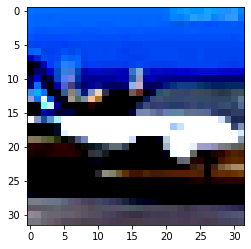

tensor([0]) airplane
tensor([[-3.1645e-04, -9.0327e+00, -1.0843e+01, -1.3982e+01, -1.2607e+01,
         -1.3960e+01, -1.2735e+01, -1.5960e+01, -8.7857e+00, -1.1014e+01]],
       grad_fn=<LogSoftmaxBackward0>)


In [104]:
img, _ = cifar10Val[90]
plt.imshow(img.permute(1, 2, 0))
plt.show()
img_batch = img.view(-1).unsqueeze(0)
out = modelOne(img_batch)
_, index = torch.max(out, dim=1)
print(index, class_names[index])
print(out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


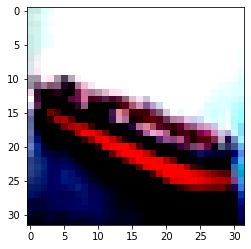

tensor([8]) ship
tensor([[-1.5879e+01, -9.1306e+00, -2.3823e+01, -1.8776e+01, -1.1320e+01,
         -2.4703e+01, -1.7924e+01, -2.5902e+01, -1.2159e-04, -1.3772e+01]],
       grad_fn=<LogSoftmaxBackward0>)


In [103]:
img, _ = cifar10Val[999]
plt.imshow(img.permute(1, 2, 0))
plt.show()
img_batch = img.view(-1).unsqueeze(0)
out = modelOne(img_batch)
_, index = torch.max(out, dim=1)
print(index, class_names[index])
print(out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


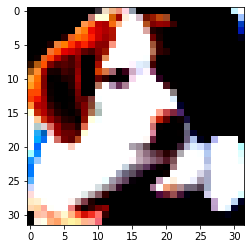

tensor([0]) airplane
tensor([[ -0.5839,  -9.5281,  -5.1015,  -0.8469, -13.1058,  -6.6114,
         -11.1308,  -5.1669,  -9.0711,  -8.5021]],
       grad_fn=<LogSoftmaxBackward0>)


In [105]:
img, _ = cifar10Val[16]
plt.imshow(img.permute(1, 2, 0))
plt.show()
img_batch = img.view(-1).unsqueeze(0)
out = modelOne(img_batch)
_, index = torch.max(out, dim=1)
print(index, class_names[index])
print(out)

In [93]:
# Extending network with two more additional hidden layers\
modelTwo = nn.Sequential(
            nn.Linear(3072,1536,),
            nn.Tanh(),
            nn.Linear(1536,768,),
            nn.Tanh(),
            nn.Linear(768,384,),
            nn.Tanh(),
            nn.Linear(384,n_out,))

learning_rate = 1e-2
optimizer = optim.SGD(modelTwo.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 300

for epoch in range(n_epochs):
    #imgs is a tensor of size 64 × 3 × 32 × 32
    #labels is a tensor of size 64
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = modelTwo(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 1.629502
Epoch: 1, Loss: 2.164317
Epoch: 2, Loss: 1.745370
Epoch: 3, Loss: 1.745916
Epoch: 4, Loss: 2.095493
Epoch: 5, Loss: 1.675906
Epoch: 6, Loss: 1.802166
Epoch: 7, Loss: 1.301533
Epoch: 8, Loss: 0.957515
Epoch: 9, Loss: 1.770405
Epoch: 10, Loss: 1.859953
Epoch: 11, Loss: 1.880516
Epoch: 12, Loss: 1.132417
Epoch: 13, Loss: 1.755363
Epoch: 14, Loss: 0.998018
Epoch: 15, Loss: 1.180712
Epoch: 16, Loss: 1.174169
Epoch: 17, Loss: 0.800500
Epoch: 18, Loss: 0.925283
Epoch: 19, Loss: 1.258785
Epoch: 20, Loss: 1.008215
Epoch: 21, Loss: 1.474986
Epoch: 22, Loss: 1.098987
Epoch: 23, Loss: 0.627407
Epoch: 24, Loss: 0.622097
Epoch: 25, Loss: 1.086006
Epoch: 26, Loss: 0.527734
Epoch: 27, Loss: 0.503805
Epoch: 28, Loss: 0.324300
Epoch: 29, Loss: 0.385214
Epoch: 30, Loss: 0.771661
Epoch: 31, Loss: 0.142005
Epoch: 32, Loss: 0.595709
Epoch: 33, Loss: 0.213458
Epoch: 34, Loss: 0.308744
Epoch: 35, Loss: 0.370916
Epoch: 36, Loss: 0.272527
Epoch: 37, Loss: 0.234083
Epoch: 38, Loss: 0.182

In [95]:
correct=0
total=0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = modelTwo(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f", correct / total)
numel_list = [p.numel() for p in modelTwo.parameters()]
print(sum(numel_list), numel_list)

Accuracy: %f 0.4832
6199690 [4718592, 1536, 1179648, 768, 294912, 384, 3840, 10]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


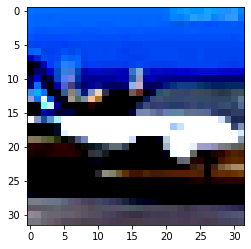

tensor([0]) airplane
tensor([[15.2743,  5.7803, -7.5059,  1.4252, -7.9772,  0.0596, -5.3066,
         -9.9243,  4.5100,  4.6869]], grad_fn=<AddmmBackward0>)


In [96]:
img, _ = cifar10Val[90]
plt.imshow(img.permute(1, 2, 0))
plt.show()
img_batch = img.view(-1).unsqueeze(0)
out = modelTwo(img_batch)
_, index = torch.max(out, dim=1)
print(index, class_names[index])
print(out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


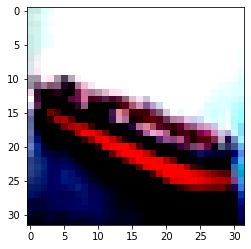

tensor([8]) ship
tensor([[  2.3447,   9.6592,  -7.1530,  -4.7776,   6.4418, -10.1662,
          -5.0702, -14.3012,  21.6464,   0.7103]],
       grad_fn=<AddmmBackward0>)


In [100]:
img, _ = cifar10Val[999]
plt.imshow(img.permute(1, 2, 0))
plt.show()
img_batch = img.view(-1).unsqueeze(0)
out = modelTwo(img_batch)
_, index = torch.max(out, dim=1)
print(index, class_names[index])
print(out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


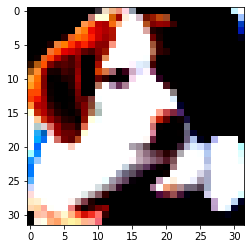

tensor([0]) airplane
tensor([[ 12.5789,   3.0598,   1.6779,   0.8924, -13.6413,  -3.5650,
         -13.4607,   5.6239,  -2.8282,   9.9867]],
       grad_fn=<AddmmBackward0>)


In [101]:
img, _ = cifar10Val[16]
plt.imshow(img.permute(1, 2, 0))
plt.show()
img_batch = img.view(-1).unsqueeze(0)
out = modelTwo(img_batch)
_, index = torch.max(out, dim=1)
print(index, class_names[index])
print(out)

In [51]:
n_out = 10  #output classes
model = nn.Sequential(
            nn.Linear(3072,1024,),
            nn.Tanh(),
            nn.Linear(1024,512,),
            nn.Tanh(),
            nn.Linear(512,128,),
            nn.Tanh(),
            nn.Linear(128,n_out,),
            nn.LogSoftmax(dim=1))

learning_rate = 1e-2
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.NLLLoss()
n_epochs = 300

training_start_time = time.time()

for epoch in range(n_epochs):
    #imgs is a tensor of size 64 × 3 × 32 × 32
    #labels is a tensor of size 64
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))

Epoch: 0, Loss: 1.793837
Epoch: 1, Loss: 1.672558
Epoch: 2, Loss: 1.602591
Epoch: 3, Loss: 1.907114
Epoch: 4, Loss: 1.699097
Epoch: 5, Loss: 1.623135
Epoch: 6, Loss: 1.394076
Epoch: 7, Loss: 1.237784
Epoch: 8, Loss: 1.657918
Epoch: 9, Loss: 1.070958
Epoch: 10, Loss: 1.296626
Epoch: 11, Loss: 1.375903
Epoch: 12, Loss: 1.228626
Epoch: 13, Loss: 1.294203
Epoch: 14, Loss: 1.338927
Epoch: 15, Loss: 0.822554
Epoch: 16, Loss: 0.427856
Epoch: 17, Loss: 1.223094
Epoch: 18, Loss: 1.216893
Epoch: 19, Loss: 1.089779
Epoch: 20, Loss: 0.721551
Epoch: 21, Loss: 0.865567
Epoch: 22, Loss: 0.533982
Epoch: 23, Loss: 0.674891
Epoch: 24, Loss: 0.617431
Epoch: 25, Loss: 0.615298
Epoch: 26, Loss: 0.722471
Epoch: 27, Loss: 0.533362
Epoch: 28, Loss: 0.838831
Epoch: 29, Loss: 0.507686
Epoch: 30, Loss: 0.365459
Epoch: 31, Loss: 0.409173
Epoch: 32, Loss: 0.546929
Epoch: 33, Loss: 0.061821
Epoch: 34, Loss: 0.242618
Epoch: 35, Loss: 0.114725
Epoch: 36, Loss: 0.156576
Epoch: 37, Loss: 0.139977
Epoch: 38, Loss: 0.280

In [52]:
#computing accuracy of model on validation set
val_loader = torch.utils.data.DataLoader(cifar10Val, batch_size=64, shuffle=False)
correct=0
total=0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f", correct / total)

numel_list = [p.numel() for p in modelTwo.parameters()]
print(sum(numel_list), numel_list)

Accuracy: %f 0.4695
3738506 [3145728, 1024, 524288, 512, 65536, 128, 1280, 10]


In [ ]:
# 8998.71s => 2.49 hrs => 2hr 30min
# Accuracy: 46.9% increased 1 percent

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


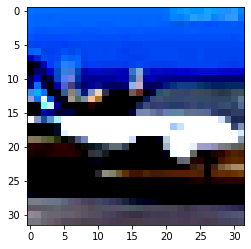

tensor([0]) airplane
tensor([[-1.4076e-03, -6.6124e+00, -1.4406e+01, -2.6974e+01, -1.9511e+01,
         -2.3427e+01, -1.7109e+01, -2.2109e+01, -9.7566e+00, -1.2279e+01]],
       grad_fn=<LogSoftmaxBackward0>)


In [84]:
img, _ = cifar10Val[90]
plt.imshow(img.permute(1, 2, 0))
plt.show()
img_batch = img.view(-1).unsqueeze(0)
out = model(img_batch)
_, index = torch.max(out, dim=1)
print(index, class_names[index])
print(out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


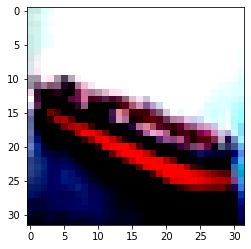

tensor([1]) automobile
tensor([[-15.8798,  -0.2701, -23.5007, -17.0878, -15.2383, -22.1521,
         -19.2212, -29.5258,  -1.4410, -15.4569]],
       grad_fn=<LogSoftmaxBackward0>)


In [102]:
img, _ = cifar10Val[999]
plt.imshow(img.permute(1, 2, 0))
plt.show()
img_batch = img.view(-1).unsqueeze(0)
out = model(img_batch)
_, index = torch.max(out, dim=1)
print(index, class_names[index])
print(out)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


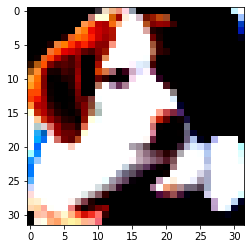

tensor([3]) cat
tensor([[ -3.4903,  -8.0371,  -7.7759,  -0.0375, -20.3081,  -9.8993,
          -5.2423,  -8.2856, -18.2312, -16.3708]],
       grad_fn=<LogSoftmaxBackward0>)


In [106]:
img, _ = cifar10Val[16]
plt.imshow(img.permute(1, 2, 0))
plt.show()
img_batch = img.view(-1).unsqueeze(0)
out = model(img_batch)
_, index = torch.max(out, dim=1)
print(index, class_names[index])
print(out)

In [126]:
n_out = 10  #output classes
modelThree = nn.Sequential(
            nn.Linear(3072,1536,),
            nn.Tanh(),
            nn.Linear(1536,512,),
            nn.Tanh(),
            nn.Linear(512,128,),
            nn.Tanh(),
            nn.Linear(128,n_out,))

#shuffle and oraganize data in minibatches
train_loader = torch.utils.data.DataLoader(cifar10, batch_size=64, shuffle=True)

learning_rate = 1e-2
optimizer = optim.SGD(modelThree.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()
n_epochs = 300

training_start_time = time.time()

for epoch in range(n_epochs):
    #imgs is a tensor of size 64 × 3 × 32 × 32
    #labels is a tensor of size 64
    for imgs, labels in train_loader:
        batch_size = imgs.shape[0]
        outputs = modelThree(imgs.view(batch_size, -1))
        loss = loss_fn(outputs, labels)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
print('Training finished, took {:.2f}s'.format(time.time() - training_start_time))

Epoch: 0, Loss: 1.907469
Epoch: 1, Loss: 1.641358
Epoch: 2, Loss: 1.690351
Epoch: 3, Loss: 1.658038
Epoch: 4, Loss: 1.643774
Epoch: 5, Loss: 1.882344
Epoch: 6, Loss: 1.556754
Epoch: 7, Loss: 1.355503
Epoch: 8, Loss: 1.967666
Epoch: 9, Loss: 1.566070
Epoch: 10, Loss: 0.954840
Epoch: 11, Loss: 1.569015
Epoch: 12, Loss: 1.201837
Epoch: 13, Loss: 0.652751
Epoch: 14, Loss: 1.031592
Epoch: 15, Loss: 1.208261
Epoch: 16, Loss: 1.924286
Epoch: 17, Loss: 1.161199
Epoch: 18, Loss: 0.979747
Epoch: 19, Loss: 0.842735
Epoch: 20, Loss: 0.741654
Epoch: 21, Loss: 0.833597
Epoch: 22, Loss: 0.667980
Epoch: 23, Loss: 0.729354
Epoch: 24, Loss: 0.434170
Epoch: 25, Loss: 0.514358
Epoch: 26, Loss: 0.926633
Epoch: 27, Loss: 1.701224
Epoch: 28, Loss: 0.476190
Epoch: 29, Loss: 0.403946
Epoch: 30, Loss: 0.169639
Epoch: 31, Loss: 0.266976
Epoch: 32, Loss: 0.274664
Epoch: 33, Loss: 0.187097
Epoch: 34, Loss: 0.145624
Epoch: 35, Loss: 0.219620
Epoch: 36, Loss: 0.176022
Epoch: 37, Loss: 0.080463
Epoch: 38, Loss: 0.122

In [127]:
#computing accuracy of model on validation set
val_loader = torch.utils.data.DataLoader(cifar10Val, batch_size=64, shuffle=False)
correct=0
total=0

with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = modelThree(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())

print("Accuracy: %f", correct / total)

numel_list = [p.numel() for p in modelThree.parameters()]
print(sum(numel_list), numel_list)

Accuracy: %f 0.4846
5574026 [4718592, 1536, 786432, 512, 65536, 128, 1280, 10]


In [ ]:
#minibatches time is much faster
#not using minibatches took like around 4 hours, using cpu
